In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())


CUDA available: True
Device count: 1


In [ ]:
!pip install ultralytics -q


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

PROJECT_ROOT = "/content/drive/MyDrive/Projects/Bird_Vs_drone"
DET_ROOT = os.path.join(PROJECT_ROOT, "object_detection_Dataset")
DATA_YAML = os.path.join(PROJECT_ROOT, "data.yaml")

print("PROJECT_ROOT:", PROJECT_ROOT)
print("DET_ROOT:", DET_ROOT)
print("DATA_YAML:", DATA_YAML)
print("DET_ROOT contents:", os.listdir(DET_ROOT))


PROJECT_ROOT: /content/drive/MyDrive/Projects/Bird_Vs_drone
DET_ROOT: /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset
DATA_YAML: /content/drive/MyDrive/Projects/Bird_Vs_drone/data.yaml
DET_ROOT contents: ['train', 'valid', 'test']


In [ ]:
DATA_YAML = "/content/drive/MyDrive/Projects/Bird_Vs_drone/data.yaml"

data_yaml_content = f"""
path: {DET_ROOT}

train: train/images
val: valid/images     # <-- changed from val/images to valid/images
test: test/images

names:
  0: Bird
  1: drone
"""

with open(DATA_YAML, "w") as f:
    f.write(data_yaml_content.strip() + "\n")

print("Wrote data.yaml at:", DATA_YAML)
!cat "$DATA_YAML"


Wrote data.yaml at: /content/drive/MyDrive/Projects/Bird_Vs_drone/data.yaml
path: /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset

train: train/images
val: valid/images     # <-- changed from val/images to valid/images
test: test/images

names:
  0: Bird
  1: drone


In [ ]:
DATA_YAML = "/content/drive/MyDrive/Projects/Bird_Vs_drone/data.yaml"

!cat "$DATA_YAML"


path: /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset

train: train/images
val: valid/images     # <-- changed from val/images to valid/images
test: test/images

names:
  0: Bird
  1: drone


In [ ]:
train_img_dir = os.path.join(DET_ROOT, "train", "images")
train_lbl_dir = os.path.join(DET_ROOT, "train", "labels")
val_img_dir   = os.path.join(DET_ROOT, "val", "images")
test_img_dir  = os.path.join(DET_ROOT, "test", "images")

print("Train images dir:", train_img_dir, "->", os.path.isdir(train_img_dir))
print("Train labels dir:", train_lbl_dir, "->", os.path.isdir(train_lbl_dir))
print("Val   images dir:", val_img_dir,   "->", os.path.isdir(val_img_dir))
print("Test  images dir:", test_img_dir,  "->", os.path.isdir(test_img_dir))

print("Sample train images:", os.listdir(train_img_dir)[:5])
print("Sample train labels:", os.listdir(train_lbl_dir)[:5])


Train images dir: /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/train/images -> True
Train labels dir: /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/train/labels -> True
Val   images dir: /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/val/images -> False
Test  images dir: /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/images -> True
Sample train images: ['009114b7cc22c807_jpg.rf.9e6c169d286607d1f4fa666caa314296.jpg', '00b178acea15d213_jpg.rf.daa21a767ecc0b8c5b1a891b58a75f34.jpg', '00ae16f9f9da14c0_jpg.rf.1ed72ffd141cf839f6031bebe1ec3e36.jpg', '009a5343c4f231ba_jpg.rf.174e2067293e9bd1ec15b8e05ff2fe44.jpg', '00940ac8aa9754df_jpg.rf.368bb947655b7384f071897b75c5cef8.jpg']
Sample train labels: ['00a2fa166f338907_jpg.rf.9a9cebf16eb2d8a04145f27e5827ec17.txt', '00a0793a49ea232b_jpg.rf.220ed110f09e8942561c46a960ddbc1a.txt', '009114b7cc22c807_jpg.rf.73894db6421175fb937c92f27c417165.txt', '00907

Sample image: /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/train/images/foto05308_png.rf.927b7d38895ac9527371a025d856bd4c.jpg
Label file  : /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/train/labels/foto05308_png.rf.927b7d38895ac9527371a025d856bd4c.txt


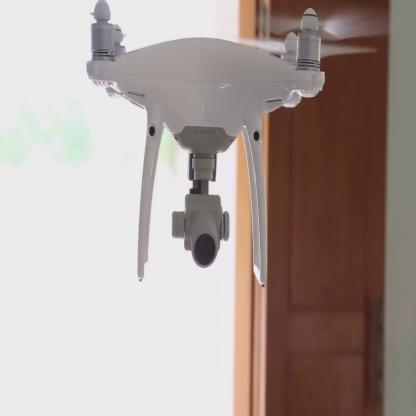


Label content:



In [ ]:
import random
from IPython.display import Image, display

sample_img_name = random.choice(os.listdir(train_img_dir))
img_path = os.path.join(train_img_dir, sample_img_name)
label_path = os.path.join(
    train_lbl_dir,
    os.path.splitext(sample_img_name)[0] + ".txt"
)

print("Sample image:", img_path)
print("Label file  :", label_path)

display(Image(filename=img_path))

if os.path.exists(label_path):
    print("\nLabel content:")
    with open(label_path, "r") as f:
        print(f.read())
else:
    print("\n⚠ No label file found for this sample.")


In [ ]:
from ultralytics import YOLO

yolo_model = YOLO("yolov8n.pt")


In [ ]:
results = yolo_model.train(
    data=DATA_YAML,
    epochs=50,
    imgsz=640,
    batch=16,
    patience=10,
    project=os.path.join(PROJECT_ROOT, "yolo_runs"),
    name="bird_drone_yolov8n",
    device=0
)


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Projects/Bird_Vs_drone/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bird_drone_yolov8n5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

In [ ]:
PROJECT_ROOT = "/content/drive/MyDrive/Projects/Bird_Vs_drone"
run_dir = os.path.join(PROJECT_ROOT, "yolo_runs", "bird_drone_yolov8n4")
print("Run dir:", run_dir)
print("Contents:", os.listdir(run_dir))

best_weights = os.path.join(run_dir, "weights", "best.pt")
print("Best weights:", best_weights)


Run dir: /content/drive/MyDrive/Projects/Bird_Vs_drone/yolo_runs/bird_drone_yolov8n4
Contents: ['weights', 'args.yaml']
Best weights: /content/drive/MyDrive/Projects/Bird_Vs_drone/yolo_runs/bird_drone_yolov8n4/weights/best.pt


In [ ]:
from ultralytics import YOLO
import os

PROJECT_ROOT = "/content/drive/MyDrive/Projects/Bird_Vs_drone"
run_name = "bird_drone_yolov8n5"  # <- use the one that has best.pt

run_dir = os.path.join(PROJECT_ROOT, "yolo_runs", run_name)
best_weights = os.path.join(run_dir, "weights", "best.pt")

print("Run dir:", run_dir)
print("Best weights:", best_weights)

best_model = YOLO(best_weights)


Run dir: /content/drive/MyDrive/Projects/Bird_Vs_drone/yolo_runs/bird_drone_yolov8n5
Best weights: /content/drive/MyDrive/Projects/Bird_Vs_drone/yolo_runs/bird_drone_yolov8n5/weights/best.pt


In [ ]:
DATA_YAML = "/content/drive/MyDrive/Projects/Bird_Vs_drone/data.yaml"

val_results = best_model.val(
    data=DATA_YAML,
    imgsz=640,
    split="val"
)

val_results


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 14.6±6.2 MB/s, size: 24.2 KB)
val: Scanning /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/valid/labels.cache... 448 images, 6 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 448/448 89.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 28/28 3.8it/s 7.4s
                   all        448        663      0.849      0.779      0.825       0.53
                  Bird        217        414      0.812       0.65      0.723      0.422
                 drone        225        249      0.886      0.908      0.927      0.639
Speed: 2.0ms preprocess, 4.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c66c0885730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
test_results = best_model.val(
    data=DATA_YAML,
    imgsz=640,
    split="test"
)

test_results


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 0.1±0.0 MB/s, size: 34.5 KB)
val: Scanning /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/labels... 224 images, 9 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 224/224 1.6it/s 2:20
val: New cache created: /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 2.9it/s 4.9s
                   all        224        273      0.818      0.792      0.827      0.532
                  Bird        121        177      0.774      0.678      0.731      0.445
                 drone         94         96      0.861      0.907      0.923      0.619
Speed: 3.7ms preprocess, 4.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c66c0e3a420>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
DET_ROOT = os.path.join(PROJECT_ROOT, "object_detection_Dataset")
test_images_dir = os.path.join(DET_ROOT, "test", "images")

print("Sample test images:", os.listdir(test_images_dir)[:5])

pred_dir = os.path.join(PROJECT_ROOT, "yolo_runs", f"{run_name}_preds")

pred_results = best_model.predict(
    source=test_images_dir,
    imgsz=640,
    conf=0.25,
    save=True,
    project=os.path.join(PROJECT_ROOT, "yolo_runs"),
    name=f"{run_name}_preds"
)

print("Predictions saved to:", pred_dir)


Sample test images: ['1cc17448662fe783_jpg.rf.69cb478e64d5c8207f19a1af6f2c39dd.jpg', '19d1575dce9ad208_jpg.rf.e7036c91288ba3aa844a479ac367a964.jpg', '151046b1f80122c4_jpg.rf.985d60e2349df3f118d9d83afc00b699.jpg', '1635c925ad4d0ef0_jpg.rf.51670241c892392b554d9144e4b76054.jpg', '1aa915659ab17fe5_jpg.rf.0c1771e6673805da513c2f5e53bd5690.jpg']

image 1/224 /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/images/00083b384685315d_jpg.rf.abfd1b2cc8c681777bae66d5327bb9ea.jpg: 640x640 1 Bird, 9.7ms
image 2/224 /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/images/00188d7f40a84793_jpg.rf.7f9da2b662dc236fbdcc1f22d8e0983e.jpg: 640x640 1 Bird, 7.9ms
image 3/224 /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/images/0028adf0e92c3da2_jpg.rf.48c97d30547a46e83abcbd1bf801c72f.jpg: 640x640 1 Bird, 38.6ms
image 4/224 /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/images/00347cbbeed4bedb_jpg.rf.a

Predicted files: ['00083b384685315d_jpg.rf.abfd1b2cc8c681777bae66d5327bb9ea.jpg', '00188d7f40a84793_jpg.rf.7f9da2b662dc236fbdcc1f22d8e0983e.jpg', '0028adf0e92c3da2_jpg.rf.48c97d30547a46e83abcbd1bf801c72f.jpg', '00347cbbeed4bedb_jpg.rf.aa19c9a7a22d76f8539ca12ac7cb82d5.jpg', '004cc8de466969bc_jpg.rf.ca1ffa31f30a92a3987e689583983973.jpg']

 00083b384685315d_jpg.rf.abfd1b2cc8c681777bae66d5327bb9ea.jpg


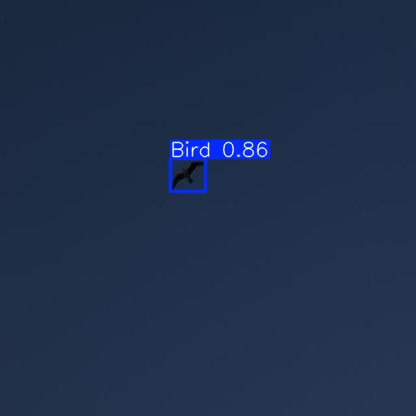


 00188d7f40a84793_jpg.rf.7f9da2b662dc236fbdcc1f22d8e0983e.jpg


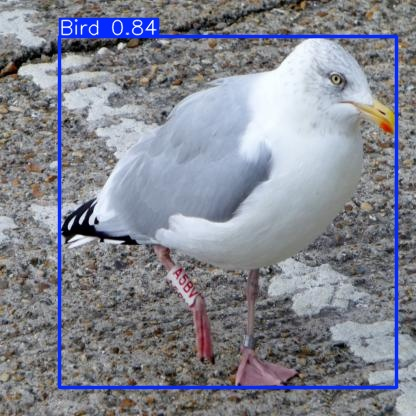


 0028adf0e92c3da2_jpg.rf.48c97d30547a46e83abcbd1bf801c72f.jpg


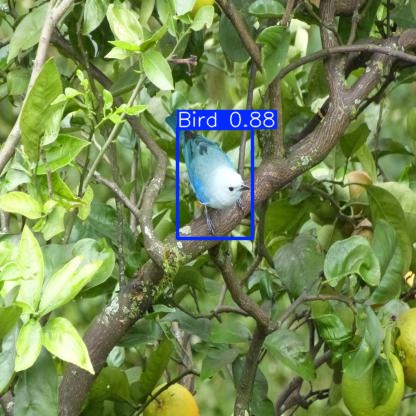

In [ ]:
from IPython.display import Image, display

pred_dir = os.path.join(PROJECT_ROOT, "yolo_runs", f"{run_name}_preds")
pred_files = [f for f in os.listdir(pred_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

print("Predicted files:", pred_files[:5])

for fname in pred_files[:3]:
    print("\n", fname)
    display(Image(filename=os.path.join(pred_dir, fname)))



image 1/224 /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/images/00083b384685315d_jpg.rf.abfd1b2cc8c681777bae66d5327bb9ea.jpg: 640x640 1 Bird, 8.0ms
image 2/224 /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/images/00188d7f40a84793_jpg.rf.7f9da2b662dc236fbdcc1f22d8e0983e.jpg: 640x640 1 Bird, 10.4ms
image 3/224 /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/images/0028adf0e92c3da2_jpg.rf.48c97d30547a46e83abcbd1bf801c72f.jpg: 640x640 1 Bird, 15.2ms
image 4/224 /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/images/00347cbbeed4bedb_jpg.rf.aa19c9a7a22d76f8539ca12ac7cb82d5.jpg: 640x640 1 Bird, 7.2ms
image 5/224 /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/images/004cc8de466969bc_jpg.rf.ca1ffa31f30a92a3987e689583983973.jpg: 640x640 1 Bird, 7.1ms
image 6/224 /content/drive/MyDrive/Projects/Bird_Vs_drone/object_detection_Dataset/test/images/006ce62

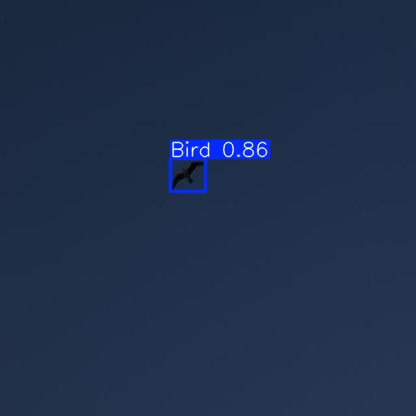


00188d7f40a84793_jpg.rf.7f9da2b662dc236fbdcc1f22d8e0983e.jpg


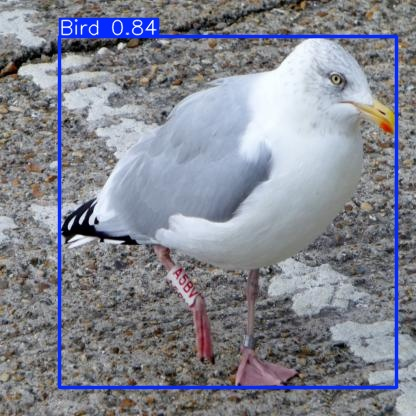


0028adf0e92c3da2_jpg.rf.48c97d30547a46e83abcbd1bf801c72f.jpg


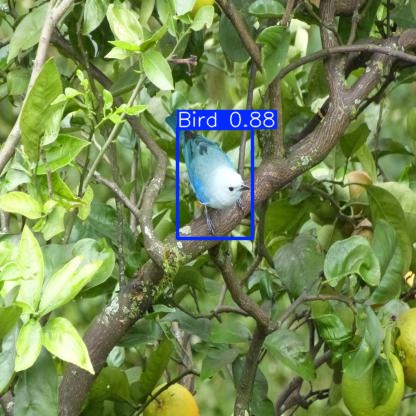

In [ ]:
import os
from ultralytics import YOLO
from IPython.display import Image, display

PROJECT_ROOT = "/content/drive/MyDrive/Projects/Bird_Vs_drone"
DET_ROOT = os.path.join(PROJECT_ROOT, "object_detection_Dataset")
test_images_dir = os.path.join(DET_ROOT, "test", "images")

run_name = "bird_drone_yolov8n5"  # the run with best.pt
run_dir = os.path.join(PROJECT_ROOT, "yolo_runs", run_name)
best_weights = os.path.join(run_dir, "weights", "best.pt")

model = YOLO(best_weights)

pred_name = f"{run_name}_preds"
pred_dir = os.path.join(PROJECT_ROOT, "yolo_runs", pred_name)

results = model.predict(
    source=test_images_dir,
    imgsz=640,
    conf=0.25,
    save=True,
    project=os.path.join(PROJECT_ROOT, "yolo_runs"),
    name=pred_name
)

print("Predictions saved to:", pred_dir)

# show a few
pred_files = [f for f in os.listdir(pred_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
for f in pred_files[:3]:
    print(f"\n{f}")
    display(Image(filename=os.path.join(pred_dir, f)))
